# Análisis de datos - Trabajo Integrador

**Alumno**: Milton Lopez


# Introducción / dataset elegido


### El dataset elegido para realizar el análisis es MNIST.

#### Preguntas a responder

- **1. ¿Se pueden encontrar heurísticas interesantes para clasificar los datos en
  función de sus valores?**

- **2. ¿Es posible encontrar representaciones de baja dimensionalidad que nos
  permitan visualizar posibles grupos?**


# Análisis exploratorio inicial


## Carga de datos y visualización inicial


In [30]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

In [31]:
# Cargamos el dataset
# Se eligió la versión de MNIST clásica, no la built-in de sklearn
digits = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = digits.data, digits.target

In [3]:
# Primeras 5 filas
data = pd.DataFrame(X)
data["target"] = y

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, 0 to target
dtypes: int64(784), object(1)
memory usage: 419.2+ MB


El dataframe indica que hay 70000 filas y 785 columnas en el dataset.


In [5]:
# Dimensiones del dataset
n_samples, n_features = X.reshape((len(X), -1)).shape
n_classes = len(np.unique(y))

print(f"Total de muestras (imágenes): {n_samples}")
print(f"Total de features (píxeles]) por muestra: {n_features}")
print(f"Número de clases (dígitos únicos): {n_classes}")

Total de muestras (imágenes): 70000
Total de features (píxeles]) por muestra: 784
Número de clases (dígitos únicos): 10


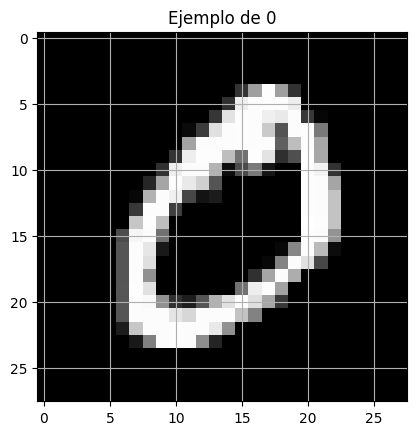

In [6]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[1]))
plt.imshow(X[1, :].reshape((28, 28)), cmap="gray")
plt.show()

### Definición del dataset:

Con estas primeras exploraciones, ya podemos definir y explicar el dataset MNIST con el que estamos trabajando.

#### Espacio ambiente:

El [espacio ambiente](<https://en.wikipedia.org/wiki/Ambient_space_(mathematics)>) es el espacio donde existen los datapoints originales (imágenes). En el caso de MNIST, vimos que cada imagen se representa con un total de 784 features; una grilla de $28 \times 28$ píxeles donde cada píxel representa una feature.

Por lo tanto, el espacio ambiente es $\mathbb{R}^{784}$.

#### Data points (imágenes) y features (píxeles):

Cada datapoint (variable) en MNIST es una imagen de $28 \times 28$ de un dígito escrito a mano. Un datapoint $x \in \mathbb{R}^{784}$ es un vector 784-dimensional, donde cada elemento del vector corresponde a una determinada intensidad del píxel.

Formalmente, un datapoint es $x^{(i)} \in \mathbb{R}^{784}$, donde $i=1,2, \ldots, m$, y $m$ es la cantidad total de imágenes.

Vimos que la cantidad de imágenes $m$ es 70000.

#### Labels / variable target:

El conjunto de labels $Y=\{0,1,2,3,4,5,6,7,8,9\}$ son los enteros que representan los dígitos del 0 al 9.

#### Dataset:

Finalmente, el dataset $\mathcal{D}$ de dígitos MNIST puede representarse como un conjunto de pares $(x, y)$ donde $x$ es la imagen e $y$ es el label/target (el dígito que representa la imagen).

$\mathcal{D}=\left\{\left(x^{(i)}, y^{(i)}\right) \mid x^{(i)} \in \mathbb{R}^{784}, y^{(i)} \in\{0,1,2, \ldots, 9\}\right\}$.


### Visualización de primeros dígitos


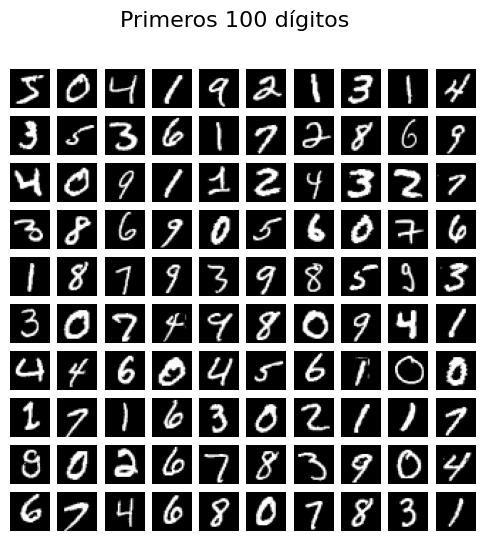

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((28, 28)), cmap="gray")
    ax.axis("off")
_ = fig.suptitle("Primeros 100 dígitos", fontsize=16)

### Representación de las imágenes

Vamos a explorar una imagen y examinar tanto la representación numérica como la visual lado a lado.

Esto es necesario ya que queremos saber:

- En qué escala está representada la intensidad de los píxeles.
- Cuál es el valor máximo y mínimo de intensidad de píxel.


Imagen 2:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0 

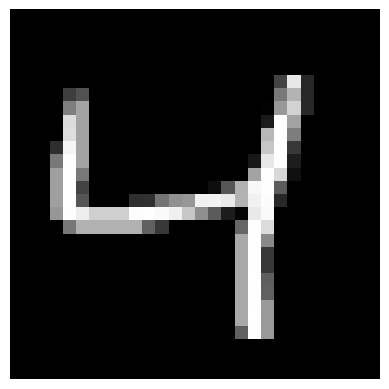

In [8]:
# Imagen del dataset
images = X.reshape(-1, 28, 28)

image_index = 2
print(f"Imagen {2}:")
print(images[image_index])
plt.imshow(images[image_index], cmap="gray")
plt.axis("off")
plt.show()

Podemos ver claramente que los valores de intensidad de los píxeles en escala de grises están en orden ascendente desde más oscuro (0) hasta más claro (255).

`0` representa un píxel totalmente negro.

`255` representa un píxel totalmente blanco.


## Identificación de tipos de datos (categórico, ordinal, etc.)

### Imágenes (features):

Como ya mencionamos, cada imagen es una matriz de 28x28 píxeles, y cada píxel representa la intensidad en escala de grises.

Los valores son de 0 a 255, donde 0 es negro y 255 es blanco.
Estas variables son:

- **Numéricas**
- **Cuantitativas**
- **Discretas**

y se usan para clasificación, ya que las diferencias en las intensidades sirven para distinguir entre los diferentes dígitos.

### Labels (objetivo):

Los labels son numéricos (0 a 9) y representan el dígito en cada imagen.
Estos son datos

- **Categóricos**
- **Ordinales**

porque tienen un orden claro (0 a 9). Sirven de dato informativo para la clasificación (lo que se quiere predecir).

El objetivo principal de trabajo con el dataset MNIST es clasificar cada imagen en una de las 10 categorías usando las intensidades de los píxeles.


## Identificación de variables de entrada y salida

### Variables de entrada (features):

Son las intensidades de los píxeles en las imágenes de los dígitos.

### Variables de salida (objetivo):

Es el dígito que representa cada imagen (0-9).


### Análisis de variables de entrada


#### Histogramas de píxeles de cada dígito


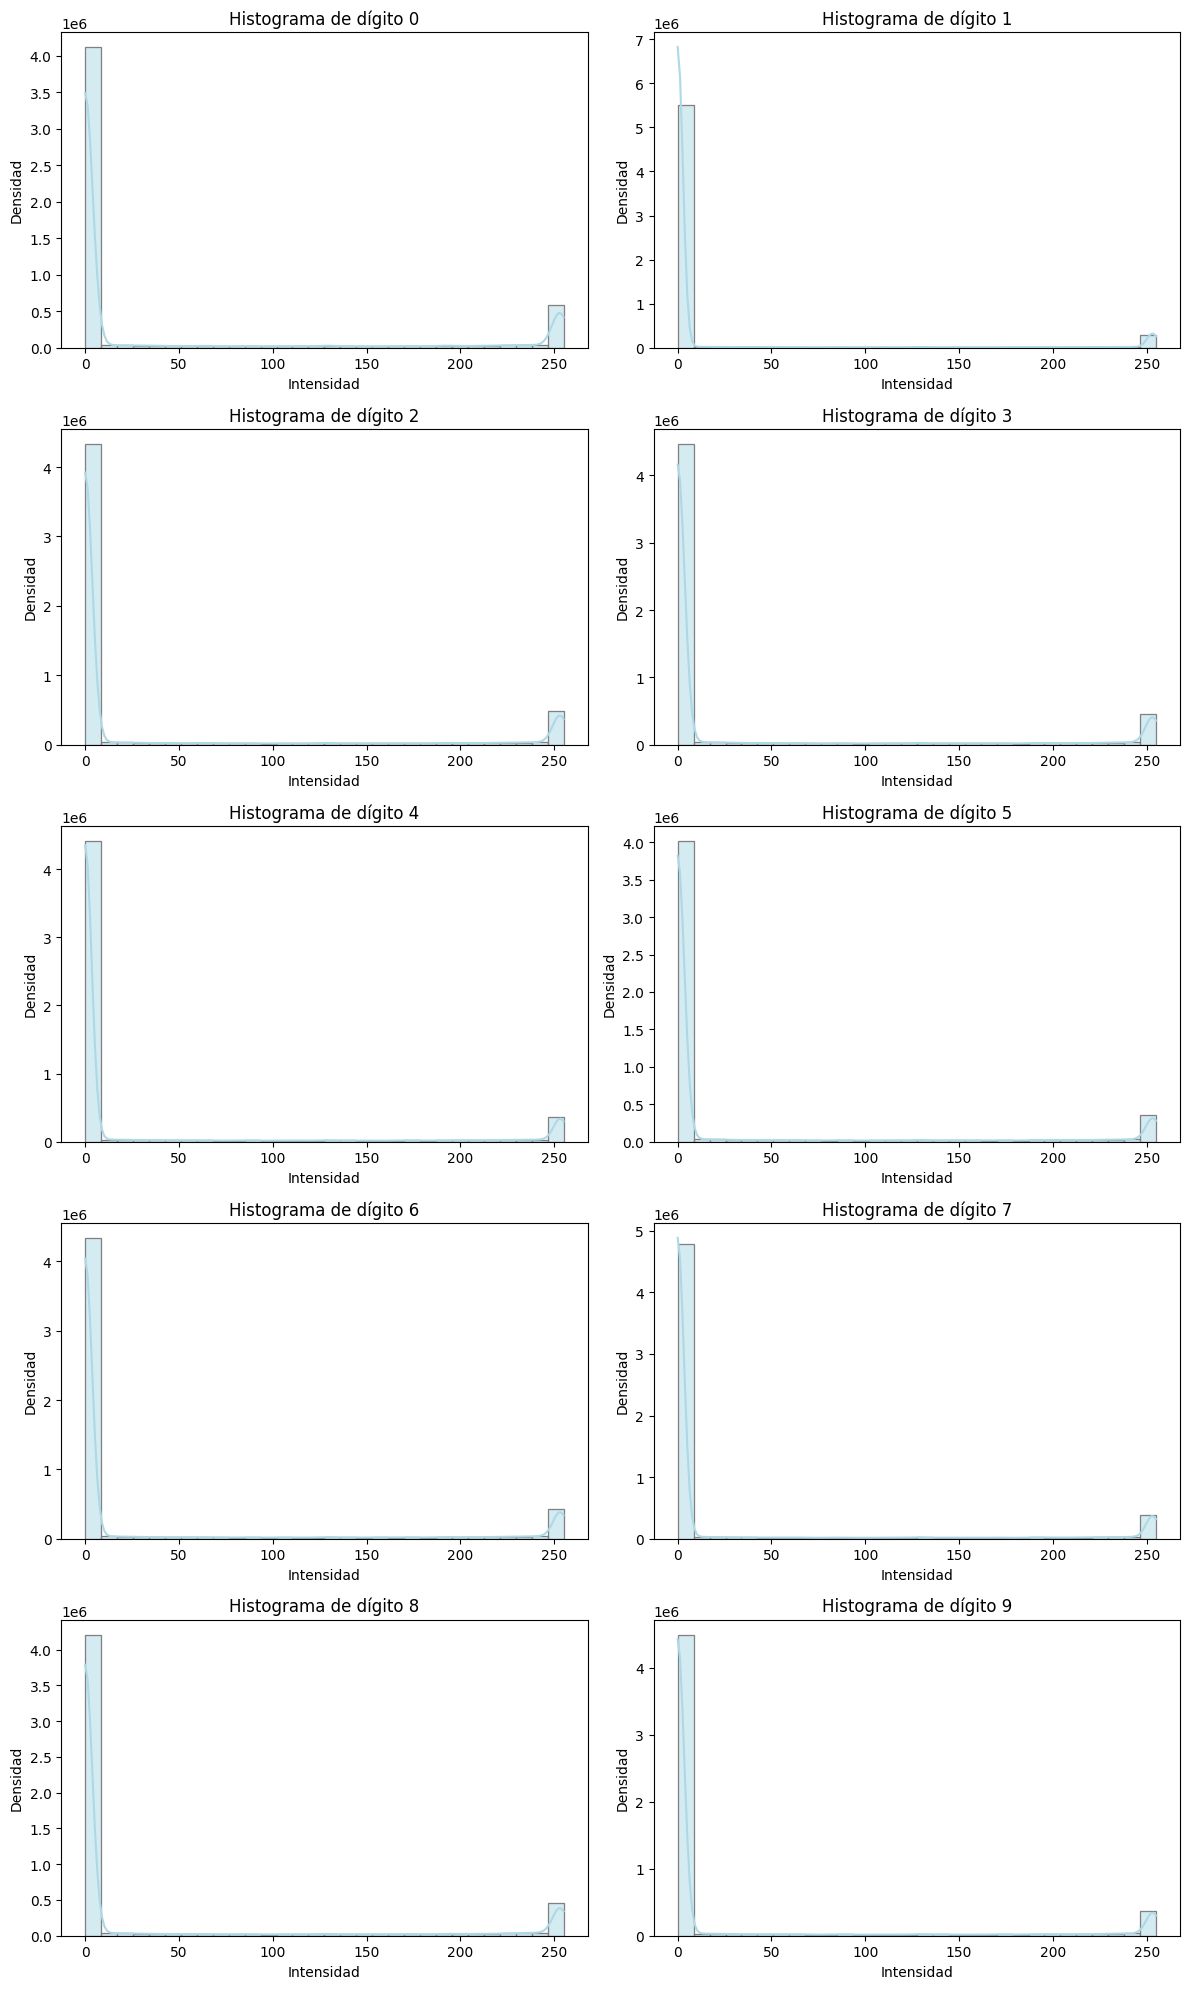

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Ploteo de histograma
for digit in range(10):
    row = digit // 2
    col = digit % 2

    intensity_values = X[y == str(digit)].flatten()
    sns.histplot(
        intensity_values,
        bins=30,
        color="lightblue",
        edgecolor="gray",
        ax=axs[row, col],
        kde=True,
    )
    axs[row, col].set_title(f"Histograma de dígito {digit}")
    axs[row, col].set_xlabel("Intensidad")
    axs[row, col].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

Notamos que el dígito 1 contiene más pixeles negros que el resto de las distribuciones, y la oblicuidad hacia la derecha es más pesada. Es consistente con la intuición ya que el 1 contiene menos píxeles blancos (píxeles correspondientes al dígito dibujado) que el resto.


#### Distribución de intensidad de píxeles general - Momentos


Intensidad media: 33.39
Intensidad mediana: 0.00
Desviación estándar de intensidad: 78.65
Oblicuidad: 2.15
Curtosis: 5.90


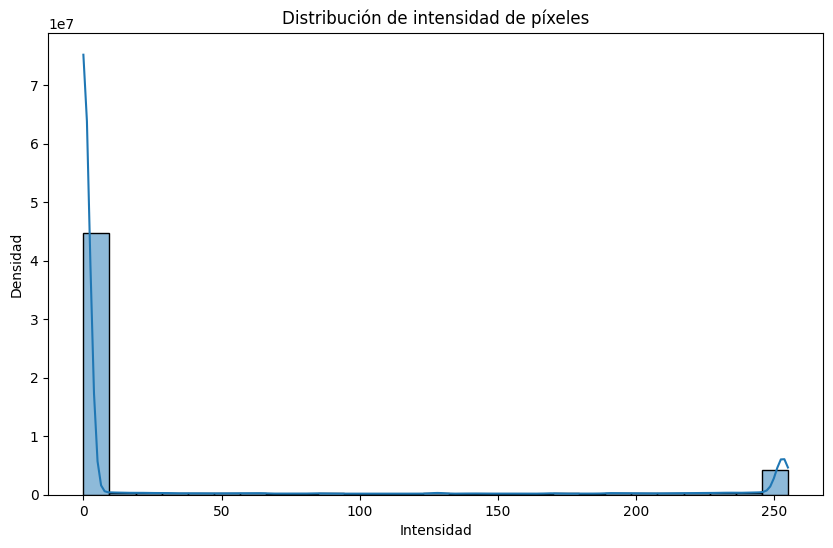

In [11]:
from scipy.stats import skew, kurtosis

X_flattened = X.reshape((X.shape[0], -1))

# Cálculo de momentos de la distribución
mean_intensity = np.mean(X_flattened)
median_intensity = np.median(X_flattened)
std_intensity = np.std(X_flattened)
skewness = skew(X_flattened.ravel())
kurt = kurtosis(X_flattened.ravel(), fisher=False)

print(f"Intensidad media: {mean_intensity:.2f}")
print(f"Intensidad mediana: {median_intensity:.2f}")
print(f"Desviación estándar de intensidad: {std_intensity:.2f}")
print(f"Oblicuidad: {skewness:.2f}")
print(f"Curtosis: {kurt:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(data=X_flattened.ravel(), kde=True)
plt.title("Distribución de intensidad de píxeles")
plt.xlabel("Intensidad")
plt.ylabel("Densidad")
plt.show()

#### Análisis estadístico de la distribución

Inmediatamente en el gráfico notamos que por la forma es una distribución bimodal (dos colas, una pesada y otra más liviana), `la mayoría de los píxeles tienen intensidades muy bajas`, cercanas a 0 (negro), con una proporción decreciente de píxeles a medida que aumenta la intensidad, y una cola más liviana en la intensidad más alta (blanco).

La cola derecha indica que existen píxeles con intensidades muy altas, que dado lo que sabemos del dataset MNIST, corresponden a las regiones blancas que representan los dígitos dibujados.

##### Dispersión:

La intensidad media es `33.39`. Esto sugiere que el píxel promedio en el dataset es bastante oscuro. Consistente con los fondos negros que predominan en las imágenes.

La mediana de intensidad es `0`, que indica que más de la mitad de los valores de píxeles son negros.

La desviación estándar de `78.65` marca una dispersión considerable de las intensidades de píxeles alrededor de la media. Pero como estamos analizando una distribución asimétrica la desviación estándar no es el momento más adecuado para considerar.

##### Asimetría (oblicuidad y curtosis):

El valor de oblicuidad de `2.15` indica una distribución sesgada a la derecha. Esto significa que hay más píxeles con valores de intensidad bajos y una cola larga en el extremo más alto de la escala de intensidad. Es decir, la frecuencia de píxeles blancos o claros (alta intensidad) es menor, pero hay suficientes como para extender la cola de la distribución.

Tanto visualmente como numéricamente con el valor de curtosis de `5.90` vemos una distribución leptocúrtica. La distribución tiene colas más pesadas y un pico más agudo que la distribución normal. Hay una probabilidad más alta de valores extremos en comparación con una normal.


### Análisis de variables de salida


#### Balance de clases

El balance de clases es importante para entrenar modelos que no resulten sesgados a una clase (dígito) específica.

Evaluamos la distribución de las clases ploteando la distribución de dígitos (cantidad de ocurrencias cada dígito único) en el dataset.


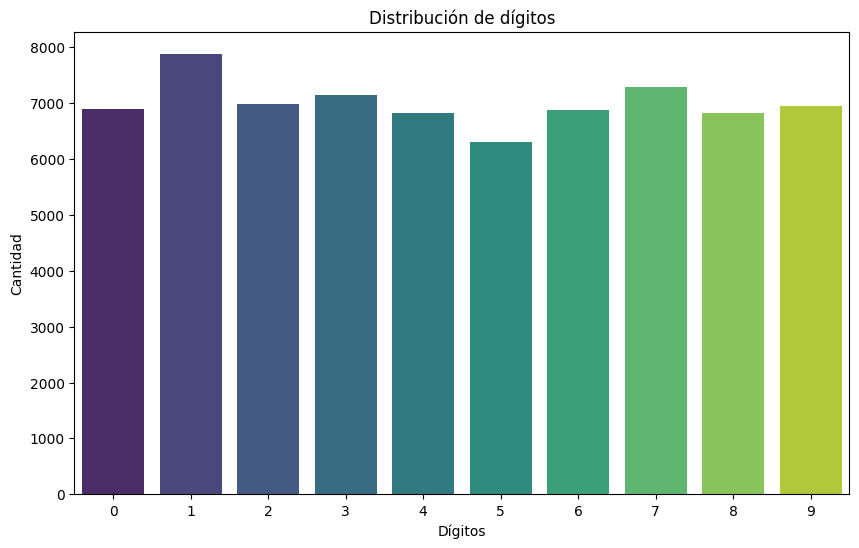

In [12]:
n_samples, n_features = X.reshape((len(X), -1)).shape
n_classes = len(np.unique(y))

# Cantidad de cada dígito
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=counts, palette="viridis", hue=unique, legend=False)
plt.xlabel("Dígitos")
plt.ylabel("Cantidad")
plt.title("Distribución de dígitos")
plt.xticks(unique)
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.show()

La distribución de los dígitos en MNIST está relativamente balanceada.

Cada clase (dígito) tiene alrededor de 7000 instancias, con el `1` siendo el de mayor cantidad. Esto indica una buena representación de todas las categorías. Si necesitamos entrenar modelos, este balanceo en el dataset reduce el riesgo de sesgo hacia clases más frecuentes.


#### Variabilidad y outliers en clasificación


Un análisis interesante para realizar con respecto a la variable de salida (dígitos) es observar si en este dataset puede haber muchos outliers a la hora de clasificar. Por intuición, podemos pensar que algunos dígitos pueden ser más fáciles de clasificar que otros. Por ejemplo, un 1 pueden ser relativamente fácil de distinguir (todos dibujan estos dígitos de forma similar) en comparación con la diferencia entre un 5 y un 2, o un 3 y un 8.

Por esta razón vamos a explorar outliers para verificar qué dígitos pueden ser más difíciles de clasificar.

Para esto, se calcula la distancia euclidea de cada imagen al centroide (media) de su label.


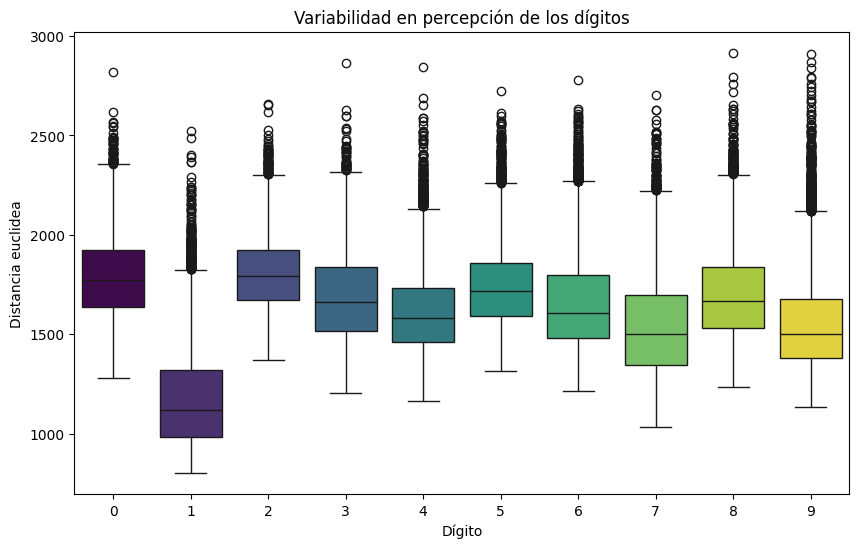

In [13]:
mean_images = {}
for digit in range(10):
    mean_images[str(digit)] = np.mean(X[y == str(digit)], axis=0)

# Distancia euclidea de cada imagen a la media de su label
distances = []
for i in range(len(X)):
    digit = str(y[i])
    distance = np.sqrt(np.sum((X[i] - mean_images[digit]) ** 2))
    distances.append({"Dígito": int(digit), "Distancia": distance})

df = pd.DataFrame(distances)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Dígito", y="Distancia", data=df, hue="Dígito", legend=False, palette="viridis"
)
plt.xlabel("Dígito")
plt.ylabel("Distancia euclidea")
plt.title("Variabilidad en percepción de los dígitos")
plt.show()

##### Observaciones

- Todos los dígitos dibujados contienen ciertos outliers que pueden ser difíciles de clasificar.
- En la mayoría de los dígitos, no hay mucha variabilidad en la forma en la que están dibujados.
- Los 1 tienen las distancias más bajas: consistente con la intuición planteada anteriormente, no hay mucha variabilidad en la forma en que se dibuja este dígito.
- La mayor variabilidad parece estar en 0 y 2, aunque cada dígito tiene casos con distancias grandes a su instancia promedio.

Vamos a visualizar algunos de estos dígitos dibujados.


In [14]:
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == str(digit_to_see))[0]
        plt.figure(figsize=(10, 5))

        n_images = min(len(indices), 50)
        for digit_num in range(n_images):
            plt.subplot(5, 10, digit_num + 1)

            mat_data = X[indices[digit_num]].reshape(28, 28)
            plt.imshow(mat_data, cmap="gray")
            plt.xticks([])
            plt.yticks([])
        plt.show()
    else:
        print("Dígito debe estar entre 0 y 9.")

#### Variabilidad de 0 (ceros)


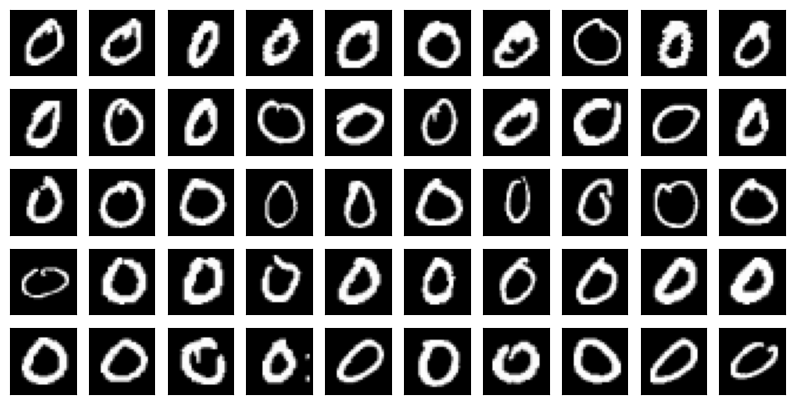

In [15]:
show_images_by_digit(0)

#### Variabilidad de 1 (unos)


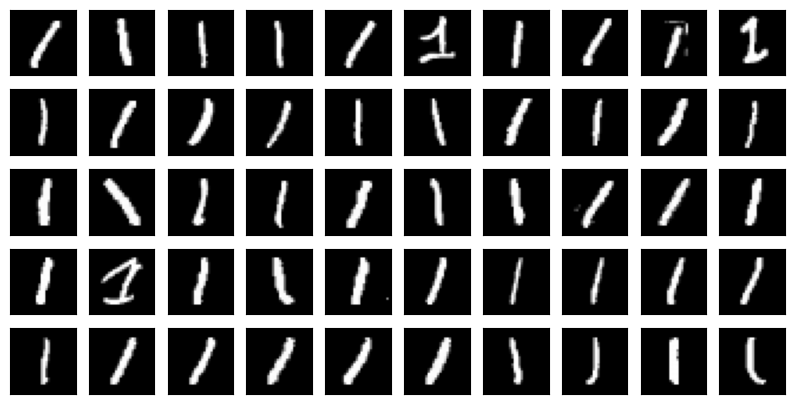

In [16]:
show_images_by_digit(1)

#### Variabilidad de 6 (seis)


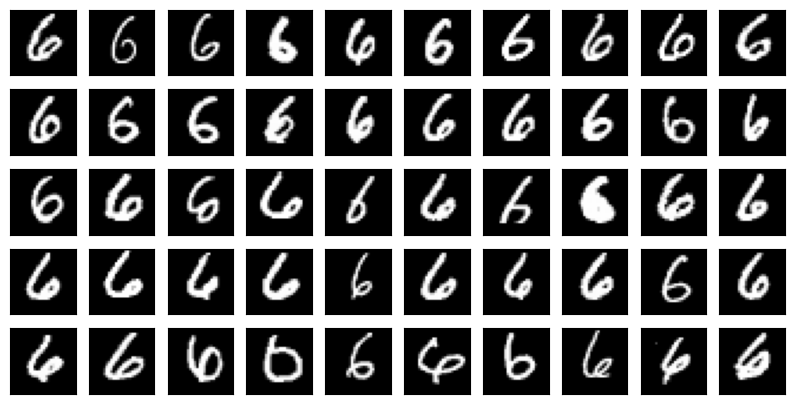

In [17]:
show_images_by_digit(6)

# Limpieza y preparación de datos / ingeniería de features


## Datos faltantes


In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [19]:
# Verificamos si hay valores faltantes en el dataset

missing_values = data.isnull().sum()
missing_values_summary = {
    "Datos faltantes": missing_values.sum(),
    "Datos faltantes for columna": missing_values[missing_values > 0],
}

missing_values_summary

{'Datos faltantes': 0, 'Datos faltantes for columna': Series([], dtype: int64)}

En MNIST, todos los píxeles en las imágenes tienen valores del 0 al 255 asignados, con lo cual no es necesario aplicar técnicas de imputación para rellenar datos faltantes.


## Codificación de variables


### Variables de Entrada:

No es necesario aplicar una codificación adicional a las variables de entrada. Las imágenes ya están en formato numérico, donde cada píxel se representa con un valor numérico de intensidad

Lo que sí podría ser útil es **normalizar los valores para asegurarse de que están en una escala común**, dependiendo del algoritmo de ML que se vaya a entrenar.

### Codificación de Variables de Salida:

Para los labels (los dígitos del 0 al 9) la necesidad de codificar también depende del algoritmo que se vaya a usar. Para entrenar algoritmos de ML clásico de clasificación multiclase no es necesario, mientras que para utilizar redes neuronales se suele aplicar one-hot encoding.


En MNIST, los dígitos ya están codificados como enteros (0-9). Esta representación numérica es adecuada para muchos algoritmos de ML, con lo cual no es necesario realizar ninguna codificación extra por el momento.


## Relaciones entre variables de entrada


En esta sección vamos a analizar correlaciones entre los píxeles del dataset para identificar si hay ciertas regiones de las imágenes que estén comúnmente relacionadas.

Vamos a hacer énfasis en tratar de encontrar respuestas a las preguntas objetivo planteadas al inicio:

**- 1. ¿Se pueden encontrar heurísticas interesantes para clasificar los datos en
función de sus valores?**

**- 2. ¿Es posible encontrar representaciones de baja dimensionalidad que nos
permitan visualizar posibles grupos?**

Se van a realizar diferentes análisis y visualizaciones usando mecanismos de reducción de dimensionalidad como **PCA (Principal Component Analysis)** y técnicas de **Manifold Learning** (aprendizaje de variedades) para identificar combinaciones de píxeles (componentes principales) que capturen la mayor variabilidad en los datos.


### Reducción de dimensionalidad


Si consideramos el dataset MNIST, ya mencionamos que consiste en puntos $x^{(i)} \in \mathbb{R}^{784}$. Cada punto siendo una imagen. Sin embargo, si intentáramos generar imágenes aleatorias muestreando uniformemente en este espacio de 784 dimensiones, la probabilidad de que obtengamos un dígito parecido a los de MNIST es muy baja.

Existe una dimensionalidad intrínseca [1] en el espacio ambiente de MNIST, y si bien los puntos están embebidos en un espacio de 784 dimensiones, viven en un subespacio mucho más chico.

Reducir la dimensionalidad nos va a permitir explorar estos subespacios para:

- Inspeccionar y encontrar posibles heurísticas en los datos (pregunta objetivo 1)
- Encontrar posibles clusters (pregunta objetivo 2)

Dependiendo de las suposiciones que hagamos sobre la naturaleza de estos subespacios, vamos a usar técnicas de reducción lineales y no lineales.


### Reducción de dimensionalidad lineal - PCA


PCA tiene como objetivo encontrar las direcciones de máxima varianza de los datos en dimensiones altas y proyectar los datos en un nuevo subespacio lineal con menos dimensiones que el original. Los ejes ortogonales (componentes principales) del nuevo subespacio se pueden interpretar como las direcciones de máxima varianza de los datos.


#### Detalles matemáticos de PCA

En PCA, se busca encontrar proyecciones $\tilde{\boldsymbol{x}}_n$ de puntos $\boldsymbol{x}_n$ que sean lo más similares posible a los puntos originales, pero que tengan una dimensionalidad intrínseca menor que la dimensión ambiente (dimensión del dataset original).

Para un dataset $\mathcal{D}=\left\{\boldsymbol{x}_1, \ldots, \boldsymbol{x}_N\right\}, \boldsymbol{x}_n \in \mathbb{R}^D$ i.i.d. con media 0 y matriz de covarianza

$$
\boldsymbol{S}=\frac{1}{N} \sum_{n=1}^N \boldsymbol{x}_n \boldsymbol{x}_n^{\top} .
$$

se asume que existe una representación comprimida de bajas dimensiones

$$
\boldsymbol{z}_n=\boldsymbol{B}^{\top} \boldsymbol{x}_n \in \mathbb{R}^M
$$

de $\boldsymbol{x}_n$, donde $\boldsymbol{B}$ una matriz de proyección

$$
\boldsymbol{B}:=\left[\boldsymbol{b}_1, \ldots, \boldsymbol{b}_M\right] \in \mathbb{R}^{D \times M}
$$

Para encontrar un subespacio $M$-dimensional de $\mathbb{R}^D$ que retenga la mayor cantidad de información posible, se eligen las columnas de la matriz $\boldsymbol{B}$ como los $M$ autovectores de la matriz de covarianza $\boldsymbol{S}$ que están asociados con los $M$ autovalores más grandes.

La cantidad máxima de varianza que PCA puede capturar con los primeros componentes principales de $M$ es

$$
V_M=\sum_{m=1}^M \lambda_m
$$

donde $\lambda_m$ son los $M$ autovalores más grandes de la matriz de covarianza $\boldsymbol{S}$. La varianza perdida por la compresión de datos a través de PCA es

$$
J_M:=\sum_{j=M+1}^D \lambda_j=V_D-V_M .
$$

También se puede definir la varianza relativa capturada como $\frac{V_M}{V_D}$, y la varianza relativa perdida por compresión como $1-\frac{V_M}{V_D}$.


#### Varianza capturada por PCA


Primero vamos a aplicar PCA sin reducir dimensionalidad, y sólo para visualizar la varianza capturada a medida que la cantidad de componentes aumenta.


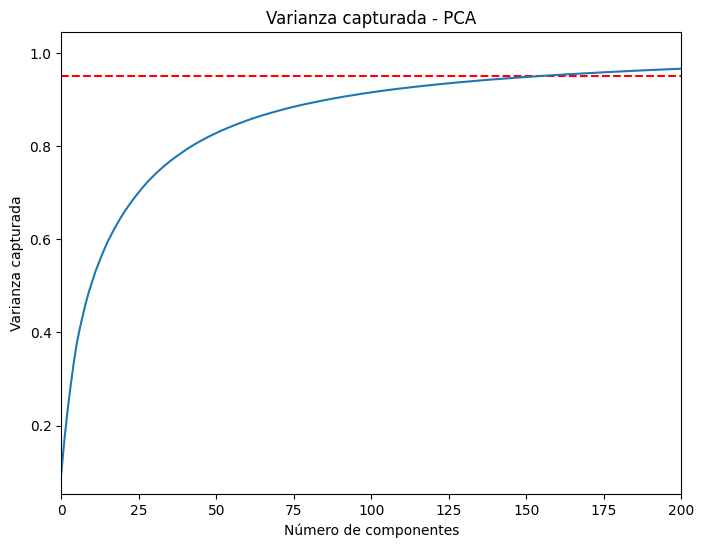

95% de varianza capturada con 154 componentes principales


In [85]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(8, 6))
# Línea en 95% de varianza
plt.plot((0, 800), (0.95, 0.95), "r--")
plt.plot(cumsum)
plt.xlim(0, 200)

plt.title("Varianza capturada - PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza capturada")
plt.show()

print("95% de varianza capturada con " + str(d) + " componentes principales")

Después de aplicar PCA al dataset, vemos que, preservando el 95% de la varianza total, nos quedan 154 features, en lugar de los 784 píxeles por imagen originales.

El dataset `es de menos del 20% del tamaño original y solo se perdió el 5% de la varianza`.


#### Visualización de clusters con PCA


Vamos a visualizar MNIST en 2 dimensiones. Los 2 ejes (componentes principales) que mayor varianza capturan.


In [86]:
import matplotlib.offsetbox
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Helpers para plotear visualizaciones con PCA y t-SNE


def get_reduced_data(X_data, reduction_technique="t-SNE"):
    X_data_2D = X_data
    if X_data_2D.shape[-1] == 2:
        return X_data_2D
    if reduction_technique == "PCA":
        pca = PCA(n_components=2)
        X_data_2D = pca.fit_transform(X_data_2D)
    elif reduction_technique == "t-SNE":
        tsne = TSNE()
        X_data_2D = tsne.fit_transform(X_data_2D)
    return X_data_2D


def plot_embeddings(X_data, y_data, reduction_technique="t-SNE", min_distance=0.03):
    np.random.seed(42)
    X_data_2D = get_reduced_data(X_data, reduction_technique)
    X_data_2D = (X_data_2D - X_data_2D.min()) / (X_data_2D.max() - X_data_2D.min())

    fig = plt.figure(figsize=(10, 8))
    cmap = plt.cm.tab10
    plt.scatter(X_data_2D[:, 0], X_data_2D[:, 1], c=y_data, s=10, cmap=cmap)
    image_positions = np.array([[1.0, 1.0]])

    for index, position in enumerate(X_data_2D):
        dist = np.sum((position - image_positions) ** 2, axis=1)
        if np.min(dist) > min_distance:
            image_positions = np.r_[image_positions, [position]]
            image_shape = int(np.sqrt(X_data[index].shape[0]))
            image_data = X_data[index].reshape(image_shape, image_shape)
            imagebox = matplotlib.offsetbox.AnnotationBbox(
                matplotlib.offsetbox.OffsetImage(image_data, cmap="binary"),
                position,
                bboxprops={"edgecolor": tuple(cmap([y_data[index]])[0]), "lw": 2},
            )
            plt.gca().add_artist(imagebox)
    plt.title(f"Embedding - {reduction_technique}")
    return fig

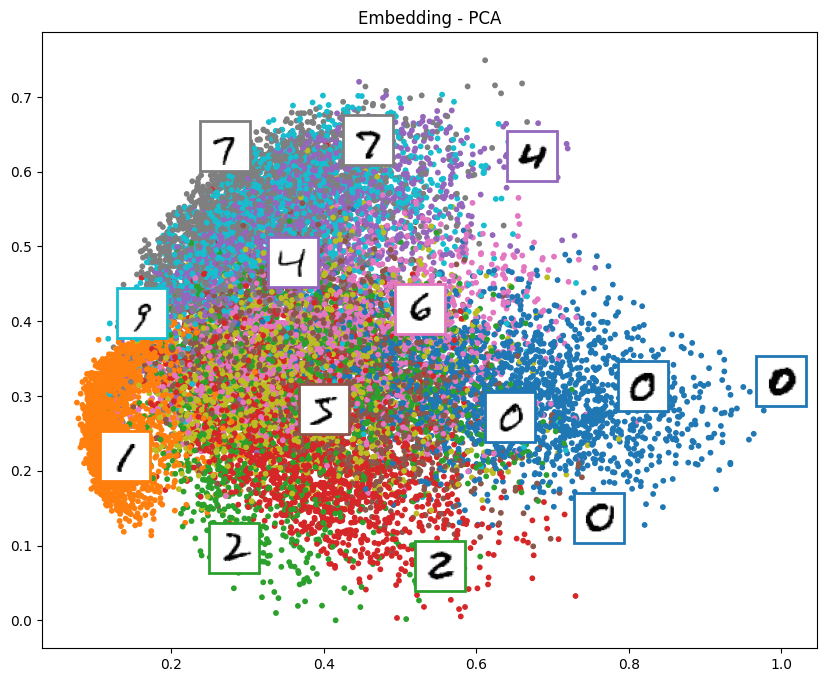

In [88]:
# Elegimos una parte del dataset
X_p = X[:20000]
y_p = y[:20000]
y_p = y_p.astype(int)

fig = plot_embeddings(X_p, y_p, reduction_technique="PCA")
plt.show()

Podemos identificar algunos clusters que se diferencian más que otros.

En particular, los dígitos `0` y `1`.

Como habíamos visto en los box plots cuando analizamos la variabilidad, el `0` destacaba por ser el dígito que mayor variabilidad contenía (los dibujos variaban considerablemente entre instancias). En este gráfico, vemos lo mismo pero con otra representación. A lo largo del eje `x` (primer componente principal) el `0` parece ser el que más varía.

Por otra parte, el `1` tenía la menor variabilidad, y podemos verlo también acá. Es un cluster chico a lo largo del primer componente, aunque bien marcado.


##### Utilidad de PCA para visualizar clusters

Por lo que vemos, incluso inspeccionando el dataset desde el punto de vista de los componentes que explican mejor la varianza, los datos MNIST parecen no formar grupos/clusters bien definidos salvo excepciones.

Como habíamos remarcado, PCA es una técnica que es mayoritariamente útil si los datos se encuentran aproximadamente en un subespacio lineal.

MNIST parece ser una estructura de altas dimensiones menos trivial, y este tipo de proyecciones lineales no van a ser suficientes para intentar encontrar grupos bien marcados.

**Sin embargo, vamos a volver a PCA más adelante para intentar analizar la importancia de las features.**


### Reducción de dimensionalidad no lineal - Manifold learning


Analizando MNIST con PCA, vimos que la estructura de las imágenes en el dataset no parece formar un subespacio lineal. Existe una hipótesis en ML llamada **manifold hypothesis** [3] o hipótesis de variedades: La mayoría de los datasets de altas dimensiones se encuentran cerca de un manifold/variedad de dimensiones mucho más bajas. Para intentar aprender la geometría y la estructura de esta variedad se usan técnicas de reducción de dimensionalidad no lineal.

Los algoritmos de reducción de dimensionalidad no lineal modelan el manifold (variedad) no lineal en el que viven los puntos del dataset. Esto se denomina **manifold learning o aprendizaje de variedades**.


#### t-SNE


Una técnica popular es **t-SNE (t-distributed Stochastic Neighbor Embedding)** [4].

t-SNE modela los datos en función de la distancias en el espacio de alta dimensiones del dataset original. Busca una distribución de probabilidad de distancias en el nuevo espacio de menos dimensiones que esté cerca de la distribución de probabilidad de distancias en el espacio original. De esta forma, aprende a embedear puntos en un espacio de dimensiones más bajas conservando las distancias del espacio original.


Aplicado a MNIST, t-SNE podría separar los diferentes dígitos en distintos clusters e incluso capturar subclusters que representen diferentes formas de escribir el mismo dígito, y nos puede descrbir mejor la estructura intrínseca de las imágenes (similitudes en el estilo del dibujo, variaciones, etc. que un método lineal como PCA no captura).


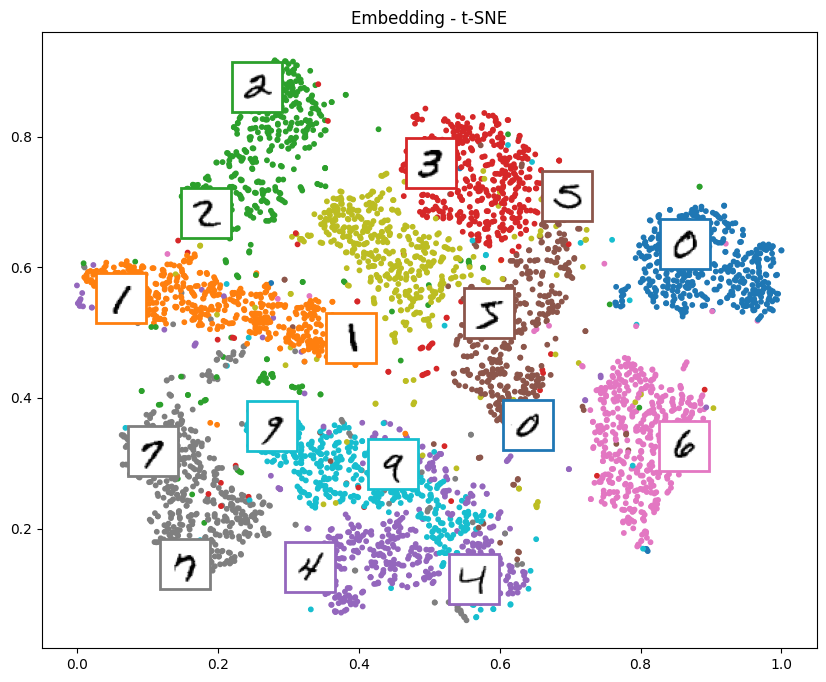

In [90]:
# Tomamos una parte del dataset

X_tsne = X[:5000]
y_psne = y[:5000]
y_psne = y_psne.astype(int)

fig = plot_embeddings(X_tsne, y_psne, reduction_technique="t-SNE")
plt.show()

Inmediatamente vemos que t-SNE forma clusters bien marcados y separados, al contrario que PCA.

Esto indica que para visualizar MNIST es mejor utilizar algoritmos de reducción de dimensionalidad no lineales que modelen el manifold donde viven los datos.

Como mencionamos, t-SNE incluso parece capturar subclusters que representan diferentes formas de escribir el mismo dígito, como en el caso del `1`.

Vamos a ver esto en detalle.


In [106]:
# Seleccionar 1s
X_1 = X[y == "1"]
one_indices = [5563, 7316, 7695, 4467, 7160, 7065, 6433, 7430, 6166, 2980]
selected_images = X_1[one_indices]

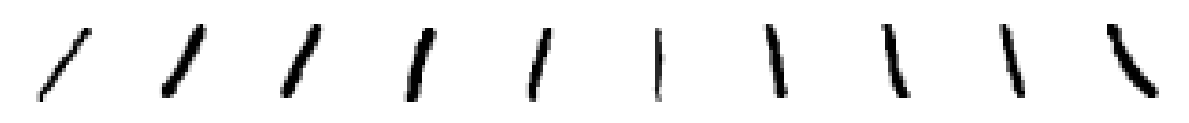

In [104]:
fig, axes = plt.subplots(1, 10, figsize=(12, 2))

for i, ax in enumerate(axes):
    img = selected_images[i].reshape(28, 28)
    ax.imshow(img, cmap="binary")
    ax.axis("off")

plt.tight_layout()
plt.show()

Se puede ver que a medida que nos movemos hacia la derecha en el cluster formado por t-SNE, la inclinación de los `1` cambia hacia la izquierda. Esta es una de las variaciones intra-dígitos que pudo ser captada por t-SNE.


## Importancia de features/variables


Antes de entrenar los modelos de ML, nos va a ser útil chequear e identificar variables/features de mayor importancia.

Para esto vamos a utilizar algunas técnicas de feature engineering para identificar qué píxeles son más importantes en la clasificación.

Volvamos a PCA y veamos qué pasa si tomamos las features (784 píxeles por imagen) y aplicamos PCA para descomponer los vectores de features en autovalores.


### Eigendígitos (autodígitos)


Cuando utilizamos PCA anteriormente, ploteamos los dos componentes principales para visualizar los clusters que se forman proyectados sobre los ejes que capturan la mayor varianza.

Ahora vamos a visualizar los componentes principales como imágenes.


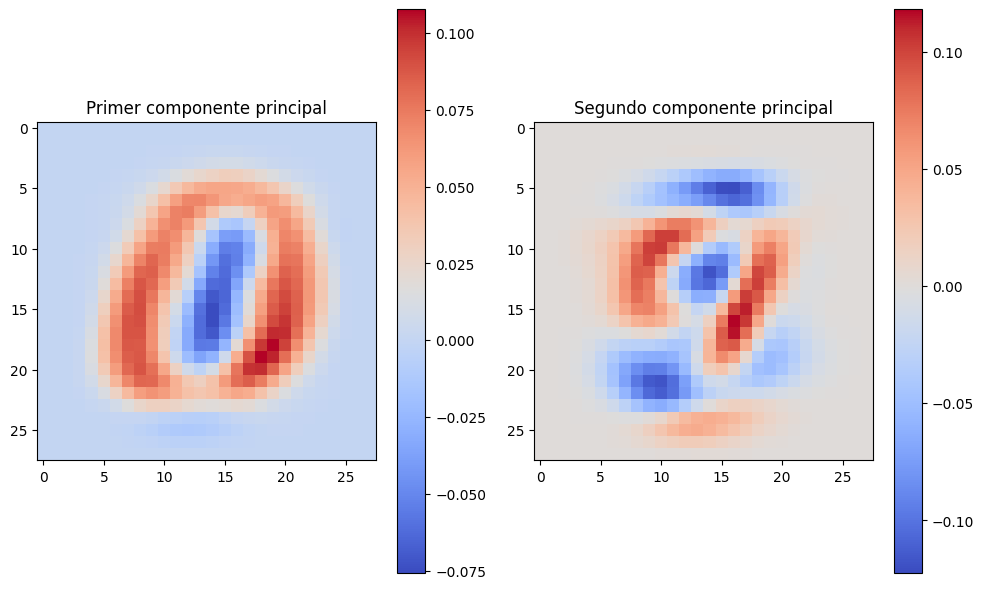

In [89]:
# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Componentes
first_component = pca.components_[0]
second_component = pca.components_[1]

# Reshapear componentes en forma de imagen 28x28
first_component_image = first_component.reshape(28, 28)
second_component_image = second_component.reshape(28, 28)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(first_component_image, cmap="coolwarm", interpolation="none")
plt.title("Primer componente principal")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(second_component_image, cmap="coolwarm", interpolation="none")
plt.title("Segundo componente principal")
plt.colorbar()

plt.tight_layout()
plt.show()

Cada imagen representa un componente principal y cada color de píxel indica el peso de ese píxel en el componente.

- Primer componente principal: Muestra las áreas de las imágenes de dígitos que más varían en el dataset. Los píxeles en rojo contribuyen positivamente, mientras que los de azul contribuyen negativamente a este componente. Este componente captura el mayor porcentaje de varianza del dataset.

- Segundo componente principal: Es ortogonal al primero y captura la mayor varianza del segundo. Las áreas roja y azul muestran dónde ocurre el segundo conjunto de variaciones en las imágenes.

Al igual que a las eigenfaces [2], a estos los podríamos llamar **eigendígitos o autodígitos**.

#### Importancia de píxeles

Un píxel con un valor positivo alto (rojo) en un componente principal significa que el píxel, cuando tiene una alta intensidad (brillo) en la imagen original, contribuye de forma significativa a la varianza a lo largo de el componente.

Un píxel con un valor negativo alto (azul) significa que una intensidad alta en este píxel contribuye negativamente a la varianza a lo largo de el componente.

En el contexto de MNIST, estas visualizaciones nos permiten ver qué partes de las imágenes (qué píxeles) son más críticas e importantes para diferenciar entre los dígitos. Por ejemplo, si las áreas rojas en el primer componente están ubicadas donde un dígito en particular generalmente tiene features únicas (el contorno del cero), indica que estas features son importantes para identificar ese dígito.


#### Primeros 50 componentes principales


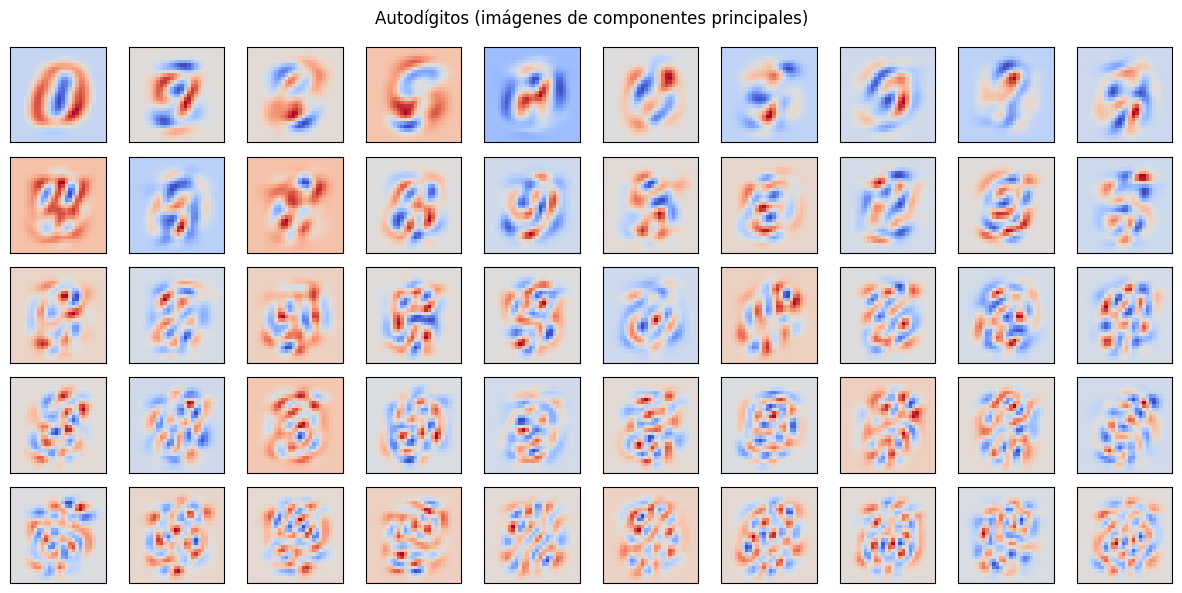

In [95]:
n_components = 50
fig, axes = plt.subplots(
    5, 10, figsize=(12, 6), subplot_kw={"xticks": [], "yticks": []}
)
axes = axes.flatten()

pca_eigen = PCA(n_components)
pca_eigen_fit = pca_eigen.fit_transform(X)

for i in range(n_components):
    eigendigit = pca_eigen.components_[i].reshape(28, 28)
    axes[i].imshow(eigendigit, cmap="coolwarm", interpolation="none")

fig.suptitle(f"Autodígitos (imágenes de componentes principales)")
plt.tight_layout()
plt.show()

Con estas primeras 50 imágenes de los componentes principales, se ven los autovalores de la matriz de covarianza cuando se los reshapea como las imágenes originales del dataset.

Podemos ver cómo los componentes de PCA intentan capturar transformaciones lineales del dataset. Cada componente parece capturar un determinado "aspecto" de las imágenes. Por ejemplo, la primera (y más importante) imagen aparentemente captura el dígito `0`, es decir, qué tan parecido a un `0` se ve el dígito.

Los primeros 10 componentes principales parecen conservar parte de la forma de los dígitos y después de eso, se convierten imágenes sin ningún dígito reconocible.


#### Importancia para entrenamiento de modelos

Dado que los autodígitos son los componentes principales obtenidos con PCA, son combinaciones lineales de las features de los píxeles originales y pueden verse como templates que capturan features comunes e importantes de los dígitos.


### Importancia de features mediante random forests


Otra manera de analizar qué píxeles son importantes a la hora de clasificar es fiteando random forests, dado que proporcionan esa información para cada feature después de entrenar el modelo.

Las importancias de las features se calcula como la media y la desviación estándar de la acumulación de impurezas dentro de cada árbol en el random forest.


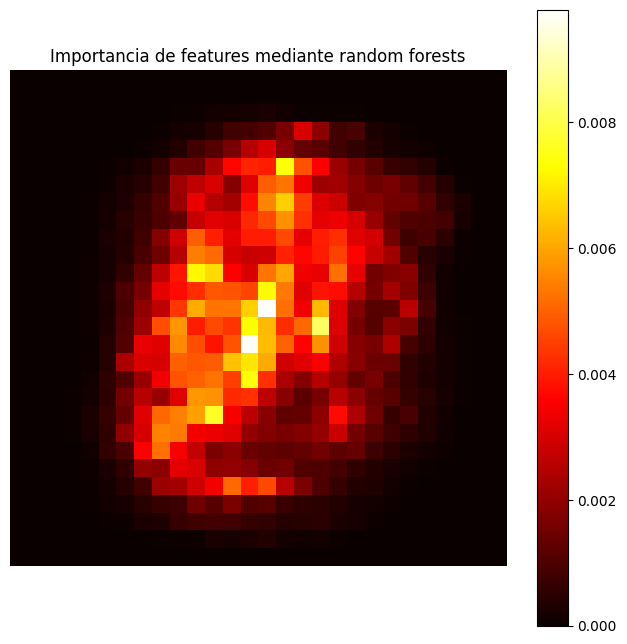

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importances_reshaped = importances.reshape(28, 28)

plt.figure(figsize=(8, 8))
plt.imshow(importances_reshaped, cmap="hot", interpolation="none")
plt.title("Importancia de features mediante random forests")
plt.colorbar()
plt.axis("off")
plt.show()

Vemos en el heatmap la importancia de cada píxel en la clasificación. Cuanto más brilloso (más hacia el rojo y el amarillo), más importante es el píxel que el random forest considera al hacer predicciones.

Este ploteo es bastante útil porque nos indica directamente qué partes de las imágenes (qué píxeles) son más críticas para que el modelo clasifique los dígitos de forma correcta. Los píxeles con mayor importancia (áreas más brillantes) son aquellos en los que el modelo se basa más para diferenciar entre los distintos dígitos.

Se puede ver que los píxeles cercanos a los bordes son los menos importantes.


# Entrenamiento de modelos


## Modelos a evaluar


Para definir modelos candidatos en un problema de clasificación multiclase como lo es MNIST, hay que considerar la naturaleza del dataset (esto ya lo analizamos exhaustivamente en los puntos anteriores) y las características de cada modelo.

Los modelos a entrenar que se eligieron son dos: Un **Multilayer Perceptron (MLP)** y un **random forest (bosque aleatorio)**.

### Multilayer Perceptron (MLP)

Un MLP es una red neuronal que se forma con múltiples capas/layers de neuronas. Cada neurona en una layer está conectada a todas las neuronas de la layer anterior y la siguiente (fully connected layers).

En un MLP con $L$ layers, cada layer $l$ tiene $N_l$ neuronas. La salida $y$ del MLP para una entrada $x$ se calcula como:

$$
\begin{aligned}
a^{(1)} & =\sigma\left(W^{(1)} x+b^{(1)}\right), \\
a^{(l)} & =\sigma\left(W^{(l)} a^{(l-1)}+b^{(l)}\right) \quad \text { para } l=2, \ldots, L-1, \\
y & =\sigma_o\left(W^{(L)} a^{(L-1)}+b^{(L)}\right),
\end{aligned}
$$

donde $a^{(l)}$ es la activación de la layer $l, W^{(l)}$ y $b^{(l)}$ son los weights y biases de la layer $l$, $\sigma$ es la función de activación (por ejemplo, ReLU, sigmoid), y $\sigma_o$ es la función de activación de la layer de salida (e.g. softmax para clasificación multiclase).

La función de pérdida (loss function) depende del tipo de tarea. En nuestro caso (clasificación) es común usar la entropía cruzada (cross entropy).

Se elige un MLP, entre otros aspectos, porque cada dígito en MNIST tiene variaciones en términos de estilo, tamaño, orientación, etc. y los MLP con activaciones no lineales pueden ser eficientes en modelar estas no linealidades. Adicionalmente, es sabido que los MLP fueron y son usados continuamente resultando en modelos con buena performance en tareas de clasificación de imágenes.

### Random Forest (Bosque aleatorio)

Un random forest es un ensamble de árboles de decisión donde cada árbol se entrena en un subconjunto del dataset, seleccionado aleatoriamente con resampling (bootstrap), y usando un subconjunto aleatorio de features en cada división.

En un random forest con $B$ número de árboles, para una entrada $x$ la predicción del random forest es el promedio (en regresión) o la moda (en clasificación) de las predicciones de todos los árboles individuales:

$$
y=\frac{1}{B} \sum_{i=1}^B T_i(x)
$$

donde $T_i(x)$ es la predicción del $i$-ésimo árbol.

Una de las razones por las que se eligió el random forest es que, como vimos en la sección anterior, miden la importancia relativa de cada feature (píxeles en nuestro caso) automáticamente después del entrenamiento, lo cual ayuda al análisis de resultados.


## MLP (Multilayer Perceptron)


### Preprocessing y normalización de datos


En este primer paso transformamos las imágenes a un formato adecuado para el MLP.

- **ToTensor:** Convierte las imágenes a a tensores, normalizando el rango de [0, 255] a [0, 1].
- **Normalize:** Normaliza los valores del tensor con una media de 0.5 y una desviación estándar de 0.5. Esto estandariza los valores de intensidad de los píxeles alrededor de 0, y mejora la estabilidad del training.


#### Separación entre sets de training y test

Cargamos MNIST con un `DataLoader`.

- **Training set:** Batch size de 64 y barajado (shuffle) para asegurar una distribución aleatoria.

- **Test set:** Batch size de 64 sin barajar. El orden no es importante durante evaluación.

No seteamos la proporción de training y de test directamente porque MNIST ya está dividido con 60k imágenes de training y 10k imágenes de test.


In [21]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# transform de PyTorch para normalizar el dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Descarga de MNIST train
trainset = datasets.MNIST(
    "~/.pytorch/MNIST_data/", download=True, train=True, transform=transform
)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Descarga de MNIST test
testset = datasets.MNIST(
    "~/.pytorch/MNIST_data/", download=True, train=False, transform=transform
)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

### Construcción del modelo


El MLP consta de tres layers completamente conectadas (fully-connected layers):

- **Primer layer:** Input de 784 features (28x28 píxeles) y output a 128 nodos.
- **Segunda layer:** Toma los 128 nodos como input y produce un output a 64 nodos.
- **Tercer layer:** Procesa los 64 nodos y produce un output a 10 nodos, correspondientes a las 10 clases de dígitos de MNIST.


Cada layer aplica una función de activación no lineal ReLU. La layer de salida usa una softmax para convertir los logits en probabilidades para cada clase.


In [22]:
from torch import nn, optim


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # 28x28 = 784 píxeles, 128 nodos de salida
        self.fc1 = nn.Linear(784, 128)
        # 128 nodos de entrada, 64 nodos de salida
        self.fc2 = nn.Linear(128, 64)
        # 64 nodos de entrada, 10 nodos de salida (10 dígitos)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))

        # Salida con softmax
        x = nn.functional.log_softmax(self.fc3(x), dim=1)
        return x


model = MLP()

### Pérdida y optimizador


- **Pérdida:** Entropía cruzada, que como mencionamos es usada para tareas de clasificación ya que mide la performance de un modelo de clasificación, que tiene como resultado un valor de probabilidad entre 0 y 1.
- **Optimizador:** Adam con un learning rate en `0.003`.


In [23]:
# La pérdida es la entropía cruzada
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

### Entrenamiento


El entrenamiento se aplica durante `20` epochs. En cada epoch:

- El modelo itera sobre el training set en batches, calcula la pérdida y ajusta los weights del modelo mediante backprop.
- Se calculan las métricas de rendimiento (pérdida y accuracy) tanto para el training set como para el test set.


In [24]:
epochs = 20

train_losses, test_losses, accuracy_list = [], [], []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # Tracking de pérdidas para ploteos
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))
        accuracy_list.append(accuracy / len(testloader))

        print(
            f"Epoch {epoch+1}/{epochs}.. "
            f"Pérdida de training: {running_loss/len(trainloader):.3f}.. "
            f"Pérdida de test: {test_loss/len(testloader):.3f}.. "
            f"Accuracy de test: {accuracy/len(testloader):.3f}"
        )

Epoch 1/20.. Pérdida de training: 0.346.. Pérdida de test: 0.186.. Accuracy de test: 0.940
Epoch 2/20.. Pérdida de training: 0.180.. Pérdida de test: 0.158.. Accuracy de test: 0.950
Epoch 3/20.. Pérdida de training: 0.142.. Pérdida de test: 0.194.. Accuracy de test: 0.941
Epoch 4/20.. Pérdida de training: 0.128.. Pérdida de test: 0.159.. Accuracy de test: 0.952
Epoch 5/20.. Pérdida de training: 0.114.. Pérdida de test: 0.128.. Accuracy de test: 0.964
Epoch 6/20.. Pérdida de training: 0.107.. Pérdida de test: 0.174.. Accuracy de test: 0.953
Epoch 7/20.. Pérdida de training: 0.104.. Pérdida de test: 0.145.. Accuracy de test: 0.959
Epoch 8/20.. Pérdida de training: 0.091.. Pérdida de test: 0.144.. Accuracy de test: 0.958
Epoch 9/20.. Pérdida de training: 0.089.. Pérdida de test: 0.172.. Accuracy de test: 0.952
Epoch 10/20.. Pérdida de training: 0.086.. Pérdida de test: 0.116.. Accuracy de test: 0.970
Epoch 11/20.. Pérdida de training: 0.081.. Pérdida de test: 0.145.. Accuracy de test: 0.9

### Evaluación


Evaluamos en el test set. La accuracy se calcula comparando las predicciones del modelo contra los labels/targets.


In [25]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy del MLP en imágenes de test: {100 * correct / total}%")

Accuracy del MLP en imágenes de test: 96.99%


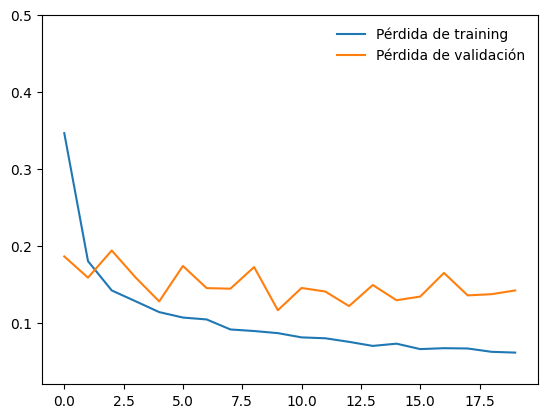

In [26]:
plt.plot(train_losses, label="Pérdida de training")
plt.plot(test_losses, label="Pérdida de validación")
plt.legend(frameon=False)

plt.ylim(0.02, 0.5)

plt.show()

**El MLP alcanzó un accuracy de aproximadamente 96.99%.**


#### Matriz de confusión


En una matriz de confusión, los valores en la diagonal principal representan el número de predicciones correctas para cada clase (cuántas veces el modelo clasificó correctamente un dígito).


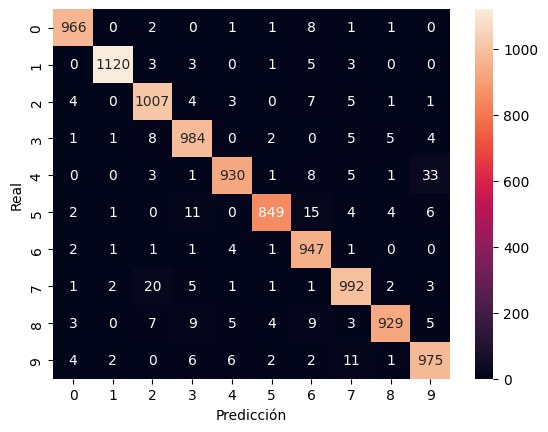

In [27]:
from sklearn.metrics import confusion_matrix

# Generar predicciones
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Plotear matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

En este caso, el MLP predijo correctamente el dígito `0` en `966` evaluaciones.

**Valores fuera de la diagonal:**

Los valores fuera de la diagonal principal son clasificaciones incorrectas. En este caso, vemos que el dígito con mayor cantidad de clasificaciones incorrectas es el `4`, clasificado incorrectamente como `9` en `33` evaluaciones. Esto se condice con lo visto en la etapa de análisis, donde vimos que existían ciertos dígitos similares entre sí.


#### Curva ROC (Receiver Operating Characteristic)


La curva ROC sirve para evaluar la capacidad del modelo para distinguir entre clases.

La **sensibilidad (ratio/tasa de verdaderos positivos)** se mide en el eje `Y` y representa la proporción de positivos que se identificaron de forma correcta.

La **especificidad (1 - tasa de falsos positivos)** se mide en el eje `X` y representa la proporción de negativos que se identificaron de forma correcta.


Un área bajo la curva ROC (AUC) de 1 indicaría un modelo perfecto, mientras que un AUC de 0.5 marca una performance no mejor que random.


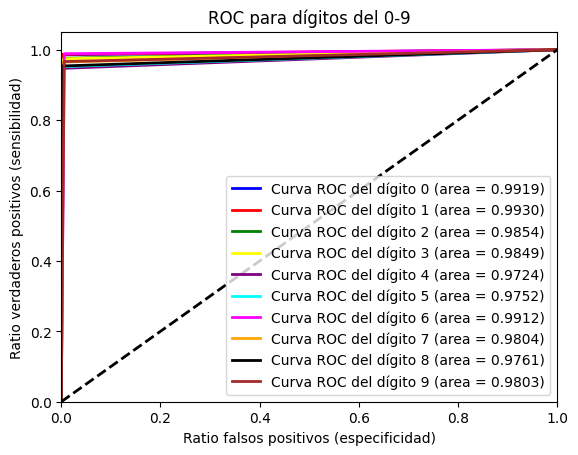

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(all_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_bin = label_binarize(all_preds, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(
    [
        "blue",
        "red",
        "green",
        "yellow",
        "purple",
        "cyan",
        "magenta",
        "orange",
        "black",
        "brown",
    ]
)
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="Curva ROC del dígito {0} (area = {1:0.4f})" "".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Ratio falsos positivos (especificidad)")
plt.ylabel("Ratio verdaderos positivos (sensibilidad)")
plt.title("ROC para dígitos del 0-9")
plt.legend(loc="lower right")
plt.show()

La curva para cada dígito tiene un área bajo la curva muy cercana a 1 que indica que el MLP entrenado tuvo una performance excelente clasificando entre los diferentes dígitos de MNIST.


## Random Forest


### Preprocessing y normalización de datos


El preprocessing/normalización es similar al MLP, salvo que para el random forest convertimos los tensores a arrays de Numpy requeridos por el clasificador de ScikitLearn.


In [32]:
from torchvision import datasets, transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

trainset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
X_train = trainset.data.numpy()
y_train = trainset.targets.numpy()
X_train = X_train.reshape(X_train.shape[0], -1)

testset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
X_test = testset.data.numpy()
y_test = testset.targets.numpy()
X_test = X_test.reshape(X_test.shape[0], -1)

### Construcción del modelo


50 árboles (`n_estimators=50`). Puede ser un modelo suficientemente robusto sin incurrir en overfitting.


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

### Evaluación


ScikitLearn proporciona métricas de evaluación con las que analizamos la performance del modelo:

- **Precisión (Precision):** Proporción de predicciones positivas verdaderas entre todas las predicciones positivas. Un valor de precisión alto indica una baja tasa de falsos positivos.

- **Recuperación (Recall):** Proporción de predicciones positivas verdaderas entre todos los positivos reales. Un valor alto de recall indica una baja tasa de falsos negativos.

- **Puntaje F1 (F1-score):** Media armónica de la precisión y el recall y es útil cuando se necesita una única métrica para comparar el rendimiento general entre clases.

- **Precisión general (accuracy):** Proporción de instancias predichas correctamente respecto del total de instancias.


In [34]:
from sklearn.metrics import classification_report

# Generar predicciones
predictions_rf = rf.predict(X_test)

print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [38]:
from sklearn.metrics import accuracy_score

rf_accuracy = 100 * accuracy_score(y_test, predictions_rf)
print(f"Accuracy del Random Forest en imágenes de test: {rf_accuracy:0.2f}%")

Accuracy del Random Forest en imágenes de test: 96.63%


**Para el random forest se reporta un accuracy general de 96.63%.**

Vemos que el random forest tuvo una performance excelente y muy similar al MLP.


#### Matriz de confusión


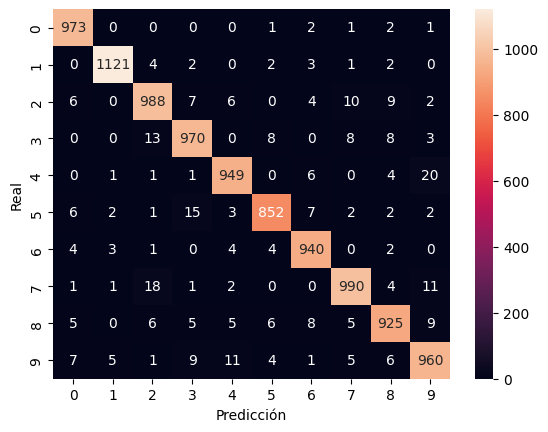

In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

El dígito `1` es el que se predice con más precisión, con `1121` aciertos de `1135` casos.

Nuevamente los dígitos más problemáticos son el `4` y el `9`. El `4` fue confundido 20 veces con el `9`.


#### Ejemplos de predicciones correctas


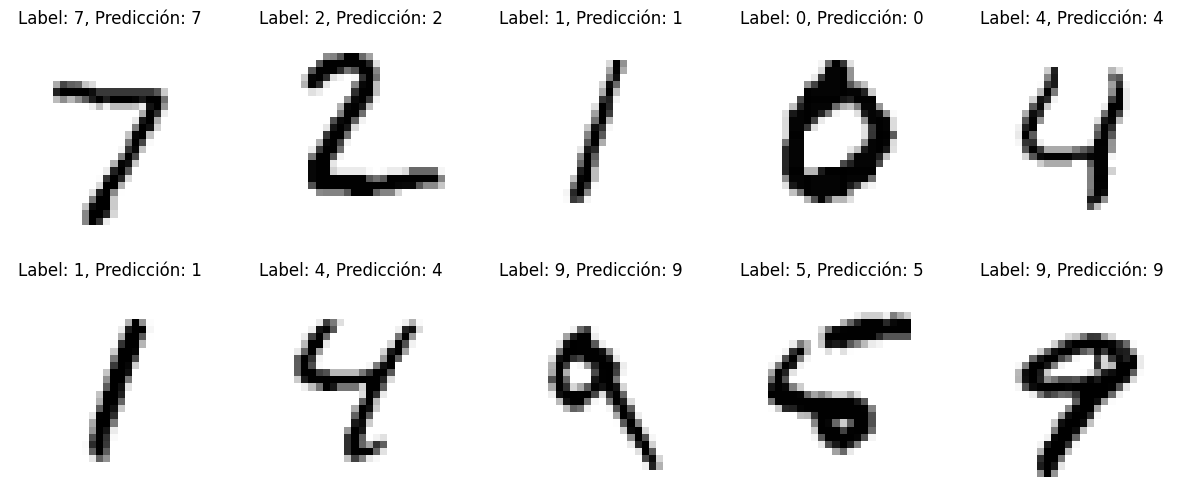

In [7]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for ax, image, label, prediction in zip(axes, X_test, y_test, predictions_rf):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}, Predicción: {prediction}")

plt.show()

#### Ejemplos de predicciones incorrectas


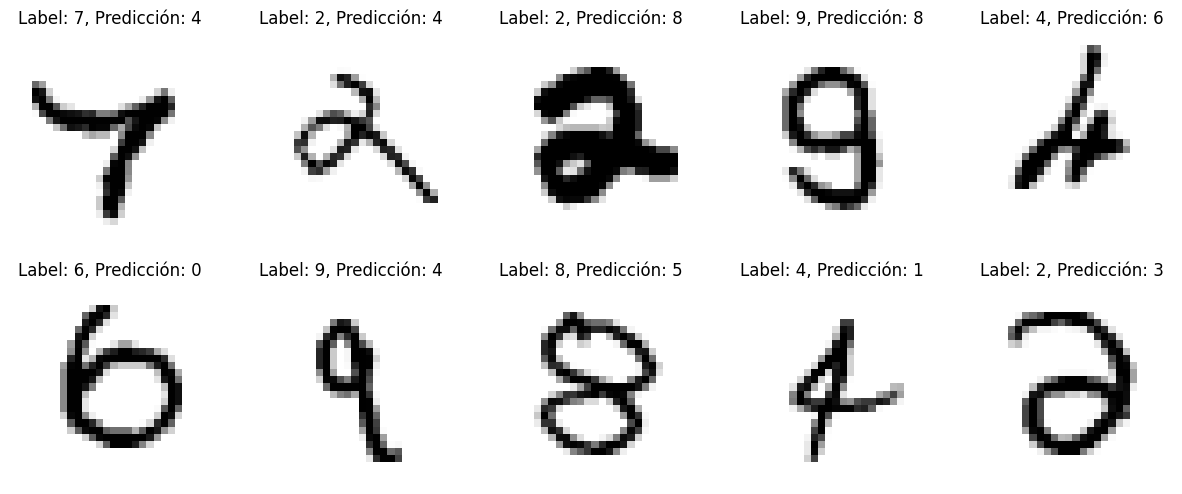

In [8]:
incorrect_indices = [
    i for i, (pred, actual) in enumerate(zip(predictions_rf, y_test)) if pred != actual
]
X_test_np = testset.data.numpy()

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for idx, ax in zip(incorrect_indices[:10], axes):
    ax.set_axis_off()
    image = X_test_np[idx].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {y_test[idx]}, Predicción: {predictions_rf[idx]}")

plt.show()

#### Curva ROC (Receiver Operating Characteristic)


In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_pred_prob = rf.predict_proba(X_test)

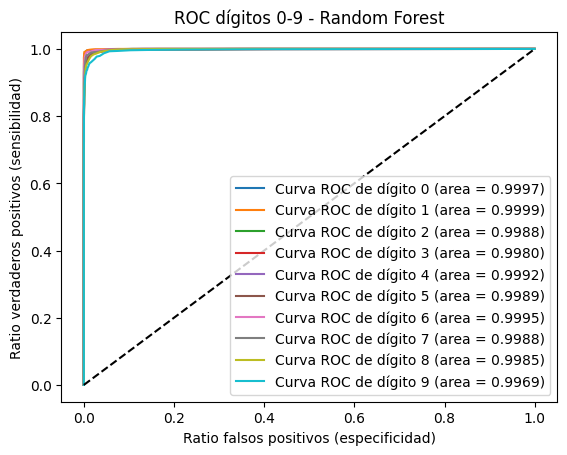

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.plot(
        fpr[i], tpr[i], label=f"Curva ROC de dígito {i} (area = {roc_auc[i]:0.4f})"
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Ratio falsos positivos (especificidad)")
plt.ylabel("Ratio verdaderos positivos (sensibilidad)")
plt.title("ROC dígitos 0-9 - Random Forest")
plt.legend(loc="lower right")
plt.show()

Al igual que en el MLP, la curva para cada dígito tiene un área bajo la curva muy cercana a 1 que indica que el random forest entrenado tuvo una performance excelente clasificando entre los diferentes dígitos de MNIST.


#### Curva Precision-Recall


Ploteamos la curva Precision-Recall (PR) que se centra en la performance del modelo en predicciones de clase positivas.

Muestra la compensación entre precisión y recall, y mientras más cercana a la esquina superior derecha, mejor la performance.

El promedio de precisión (Precision average) es un resumen de la curva PR y se calcula como el área bajo la curva PR. Mientras más alto el valor mejor la performance del clasificador.


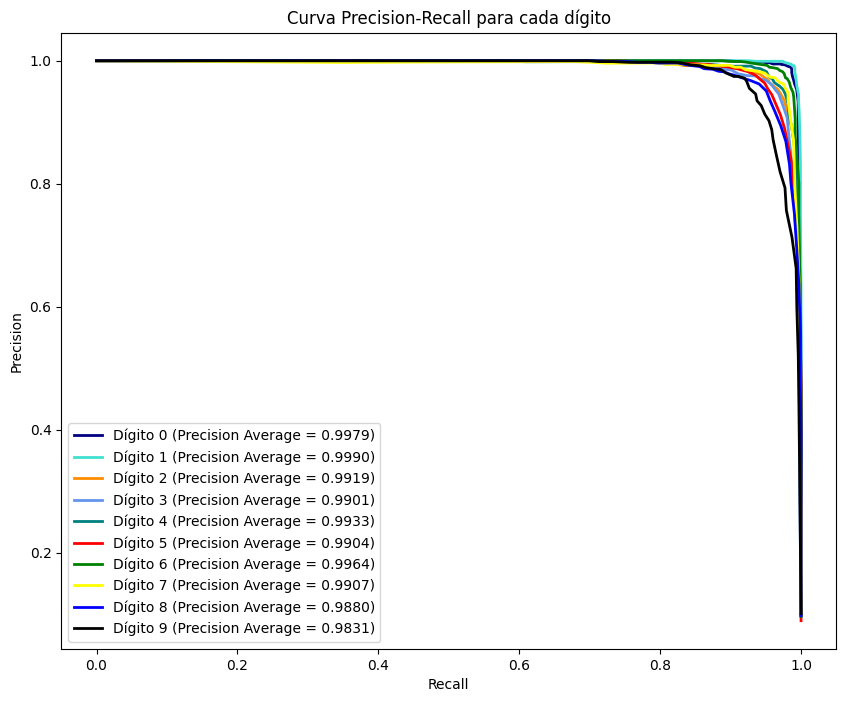

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=np.arange(10))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(
        y_test_bin[:, i], y_pred_prob[:, i]
    )
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

colors = cycle(
    [
        "navy",
        "turquoise",
        "darkorange",
        "cornflowerblue",
        "teal",
        "red",
        "green",
        "yellow",
        "blue",
        "black",
    ]
)

plt.figure(figsize=(10, 8))

for i, color in zip(range(10), colors):
    plt.plot(
        recall[i],
        precision[i],
        color=color,
        lw=2,
        label="Dígito {0} (Precision Average = {1:0.4f})".format(
            i, average_precision[i]
        ),
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall para cada dígito")
plt.legend(loc="best")
plt.show()

Los promedios de precisión son altos para cada dígito.


#### Cross-Validation


Por último, para tener una idea más precisa de la performance del random forest con diferentes splits del dataset, vamos a realizar una validación cruzada (cross-validation).

La cross-validation nos da un estimado insesgado de la performance del modelo.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_crossval = RandomForestClassifier(n_estimators=50)

In [19]:
# 5-fold cross-validation
cv_scores = cross_val_score(rf_crossval, X_train, y_train, cv=5, scoring="accuracy")

print("Scores de cross-validation:", cv_scores)
print("Cross-validation accuracy - media:", cv_scores.mean())
print("Cross-validation accuracy - desviación estándar:", cv_scores.std())

Scores de cross-validation: [0.96566667 0.96325    0.96191667 0.96083333 0.96875   ]
Cross-validation accuracy media: 0.9640833333333333
Cross-validation accuracy - desviación estándar: 0.0028367626305741992


**Fold 1:** `96.57%`

**Fold 2:** `96.33%`

**Fold 3:** `96.19%`

**Fold 4:** `96.08%`

**Fold 5:** `96.88%`


La accuracy media de la cross-validation es `96.41%`.

La desviación estándar es del `0.28%`.

Dado que la variación de accuracy entre los diferentes folds es baja y la accuracy general para cada fold es alta, podemos ver que el random forest es estable y no es sensible a las variaciones en el dataset.


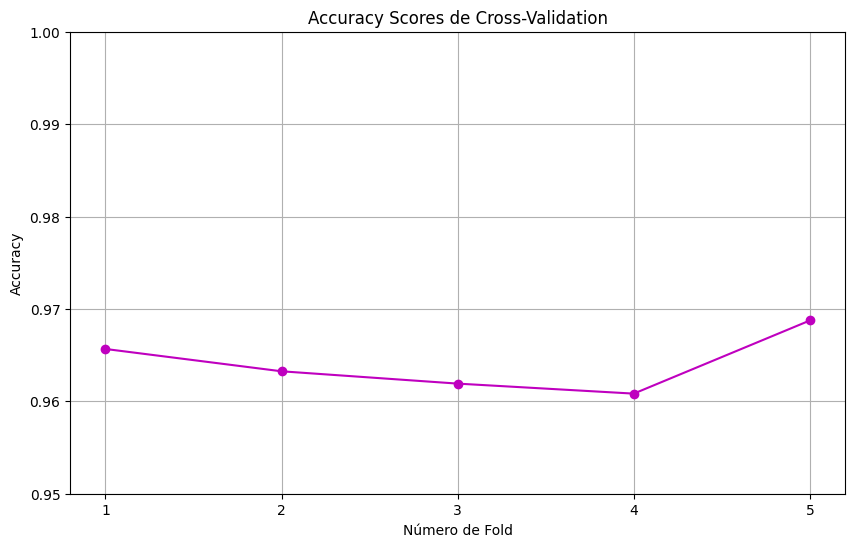

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker="o", linestyle="-", color="m")
plt.title("Accuracy Scores de Cross-Validation")
plt.xlabel("Número de Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(cv_scores) + 1))

plt.ylim(0.95, 1.0)

plt.grid(True)
plt.show()

## Comparación, análisis y evaluación de resultados


Para analizar y evaluar comparativamente los resultados de los modelos MLP y random forest en la tarea de clasificación multiclase de dígitos de MNIST vamos a considerar la naturaleza del dataset, la arquitectura de los modelos, y la performance medida con métricas de evaluación.

### Naturaleza del dataset

Como ya mencionamos anteriormente, MNIST es un dataset estándar de clasificación de imágenes y está relativamente limpio y preprocesado.

Las imágenes son de tamaño uniforme (28x28 píxeles) en escala de grises, las variables son cuantitativas discretas y tienen dígitos escritos a mano centrados en la imagen. Esto simplificó el proceso de preprocessing y permitió que el MLP y el random forest se concentren en aprender las features esenciales de los dígitos.

### Arquitectura de los modelos

#### MLP

La arquitectura permite aprender representaciones jerárquicas de datos para tareas de clasificación de imágenes donde los patrones visuales son variados. La precisión de casi el 97% en el training set indica que el MLP es adecuado para MNIST; aprendió las diferencias y variabilidades entre los dígitos.

**Accuracy de 96.99%**

#### Random forest

Es un ensamble de árboles de decisión, y se postula que fue eficaz en la clasificación de MNIST por la capacidad para manejar la variabilidad intrínseca de los datos, capturando bien la distribución de clases que ya estaban bien balanceadas.

**Accuracy de 96.63%**

### Performance - métricas de evaluación

**Matrices de confusión:** Tanto el MLP como el random forest mostraron una buena performance con valores altos en la diagonal principal y errores mínimos en la clasificación de dígitos. Los errores que aparecen están generalmente asociados con dígitos similares, como los dígitos `4` y `9`.

**Curvas ROC y Precision-Recall:** Las curvas ROC para cada dígito indican un AUC cercano a 1 para los dos modelos, lo cual es excelente. Las curvas Precision-Recall también muestran una buena performance, con un promedio de precisión alto para todos los dígitos. Ambos modelos tienen una muy buena capacidad para distinguir cada clase y mantener una tasa baja de falsos positivos y falsos negativos.


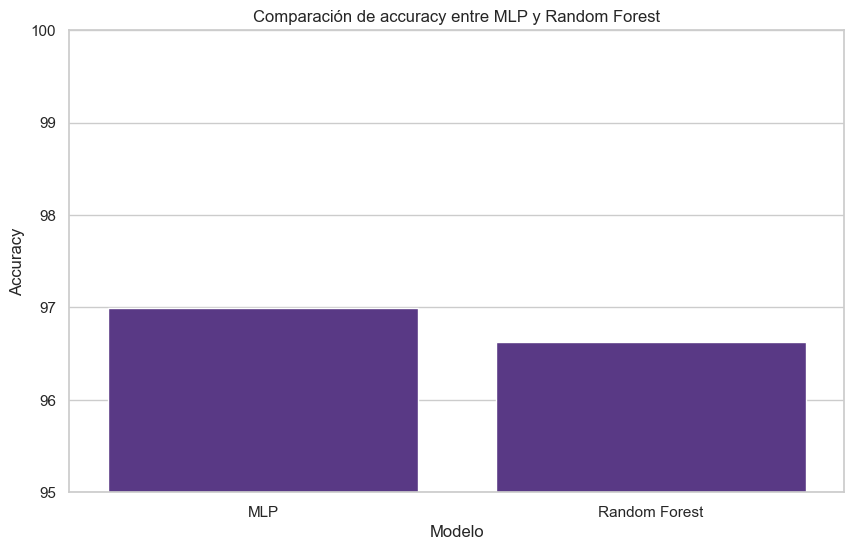

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accuracies_df = pd.DataFrame(
    {
        "Modelo": ["MLP", "Random Forest"],
        "Accuracy": [96.99, 96.63],
    }
)

sns.set(style="whitegrid")
sns.set_palette("Purples_r")

plt.figure(figsize=(10, 6))
accuracy_plot = sns.barplot(x="Modelo", y="Accuracy", data=accuracies_df)
plt.title("Comparación de accuracy entre MLP y Random Forest")
plt.ylim(95, 100)
plt.show()

In [43]:
accuracies_df

,Modelo,Accuracy
0,MLP,96.99
1,Random Forest,96.63


### Comparación final

#### Generalización

El MLP marca una leve ventaja en accuracy, aunque la diferencia es mínima y puede deberse al azar o a la variabilidad del proceso de training.

#### Robustez y estabilidad

La evaluación del random forest mediante cross-validation indica que es extremadamente estable. Esto puede sugerir que es muy poco propenso al overfitting y podría generalizar mejor a nuevos datos. Sin embargo la robustez de los MLP es conocida y se requiere tuning de hiperparámetros para comparar con el random forest.

#### Interpretabilidad

El random forest tiene la ventaja de ser más interpretable debido a la naturaleza intuitiva de los árboles de decisión que computa la importancia de features (en el caso de MNIST, qué píxeles son más importantes).


# Preguntas objetivo iniciales - análisis


Las preguntas objetivo iniciales eran:

- **1. ¿Se pueden encontrar heurísticas interesantes para clasificar los datos en
  función de sus valores?**

- **2. ¿Es posible encontrar representaciones de baja dimensionalidad que nos
  permitan visualizar posibles grupos?**

Estas preguntas ya fueron respondidas en la etapa detallada de análisis. Sin embargo apartamos esta sección para proporcionar un resumen de las respuestas.

## Heurísticas de clasificación

Vimos cómo los píxeles individuales en las imágenes MNIST pueden proporcionar información heurística para la clasificación. Identificamos que ciertos píxeles tienen más peso en la determinación de la clase de un dígito que otros. Por ejemplo, los píxeles situados en los bordes de la imagen tienden a ser menos informativos/importantes que los del centro, donde se concentra la forma del dígito.

También aplicamos **PCA** y visualizamos que los primeros componentes principales capturan un determinado “aspecto” de las imágenes. Por ejemplo, el primer componente principal aparentemente captura el dígito `0`, es decir, qué tan parecido a un `0` se ve el dígito.

## Representaciones de baja dimensionalidad - Visualización de grupos

Aplicamos PCA nuevamente para reducir la dimensionalidad del dataset y transformamos el dataset original que vive en un espacio ambiente $\mathbb{R}^{784}$, correspondiente a los píxeles de las imágenes de $28 \times 28$, a un espacio de baja dimensionalidad conservando el `95%` de la varianza de los datos. Esto nos permitió visualizar los datos en dos dimensiones y observar la formación de grupos aunque no muy marcados.

Posteriormente vimos que **t-SNE** (reducción de dimensiones no lineal) forma clusters bien marcados y separados, al contrario que PCA, ya que t-SNE puede modelar el manifold donde viven los datos. t-SNE incluso pudo capturar subclusters que representan diferentes formas de escribir el mismo dígito, como en el caso del `1`.


# Referencias

[1] On the Intrinsic Dimensionality of Image Representations:
https://arxiv.org/abs/1803.09672

[2] Low-dimensional procedure for the characterization of human faces: https://www.cs.bgu.ac.il/~ben-shahar/Teaching/Computational-Vision/Readings/1987-Sirovich_and_Kirby-Low_Dimensional_Procedure_for_the_Characterization_of_Human_Faces.pdf

[3] Manifold Hypothesis - Wikipedia: https://en.wikipedia.org/wiki/Manifold_hypothesis

[4] Visualizing Data using t-SNE: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
